In [117]:
import numpy as np
import matplotlib.pyplot as plt
from univariate import *

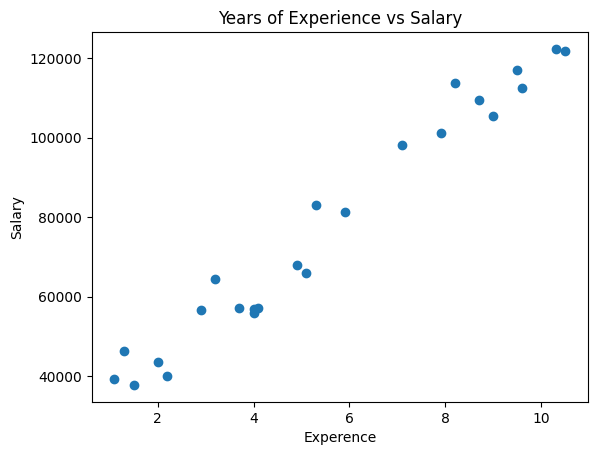

In [118]:
train_x,train_y,test_x,test_y = load_data(training_data=0.8)

plt.scatter(train_x,train_y)
plt.xlabel("Experence")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.show()


In [119]:
train_x_norm = z_score_normalized_features(train_x)
test_x_norm = z_score_normalized_features(test_x)
print(test_x_norm)
# y_norm = z_score_normalized_features(y)

initial_w = 0.
initial_b = 0.

w,b,w_history,b_history,cost_history = calculate_gradient_descent(train_x_norm,train_y,initial_w,initial_b,alpha=0.01,iterations=1000)
print(f"Calculated w : {w} , b : {b}")

train_predictions = predict(train_x_norm,w,b)
test_predictions = predict(test_x_norm,w,b)
# denormalized_predicted_y = z_score_denormalized_features(y,predicted_y)



[ 1.59163303 -0.97398439 -0.47511434 -0.04751143  1.02149583 -1.11651869]
Iterations : 0 Cost : 3.34e+09
Iterations : 100 Cost : 4.60e+08
Iterations : 200 Cost : 7.44e+07
Iterations : 300 Cost : 2.28e+07
Iterations : 400 Cost : 1.58e+07
Iterations : 500 Cost : 1.49e+07
Iterations : 600 Cost : 1.48e+07
Iterations : 700 Cost : 1.48e+07
Iterations : 800 Cost : 1.48e+07
Iterations : 900 Cost : 1.48e+07
Iterations : 1000 Cost : 1.48e+07
Calculated w : 28411.563175133946 , b : 77308.66234452024


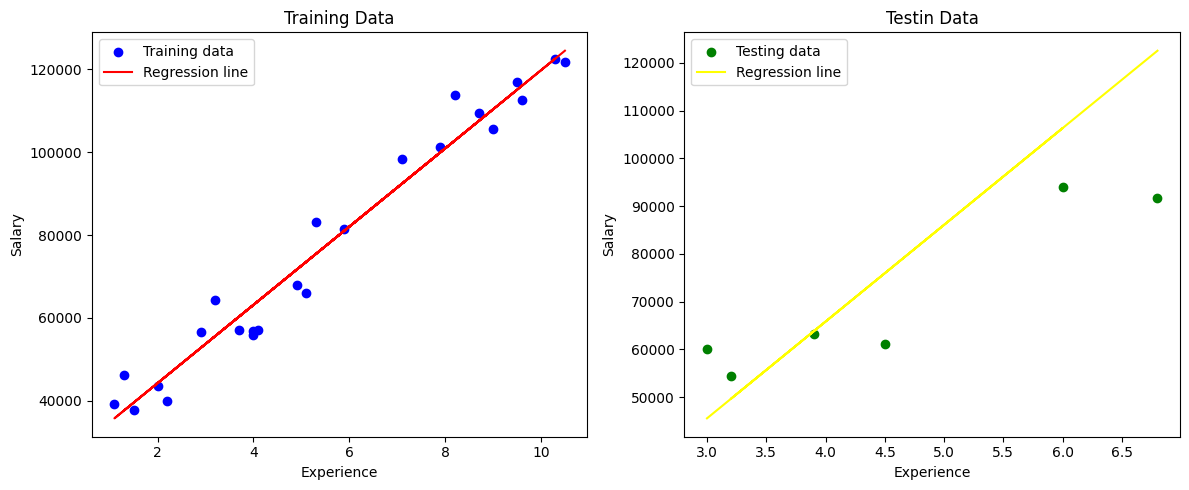

In [120]:
plt.figure(figsize=(12, 5))

# Training Data
plt.subplot(1, 2, 1)
plt.scatter(train_x, train_y, color='blue', label='Training data')
plt.plot(train_x, train_predictions, color='red', label='Regression line')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Training Data")

# Testing Data
plt.subplot(1, 2, 2)
plt.scatter(test_x, test_y, color='green', label='Testing data')
plt.plot(test_x, test_predictions, color='yellow', label='Regression line')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Testin Data")

plt.tight_layout()
plt.show()

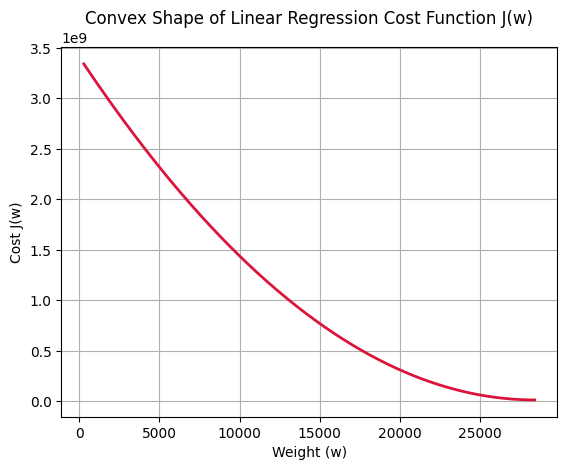

In [121]:
# plt.figure(figsize=(8,5))
plt.plot(w_history, cost_history, color='crimson', linewidth=2)
plt.title("Convex Shape of Linear Regression Cost Function J(w)")
plt.xlabel("Weight (w)")
plt.ylabel("Cost J(w)")
plt.grid(True)
plt.show()

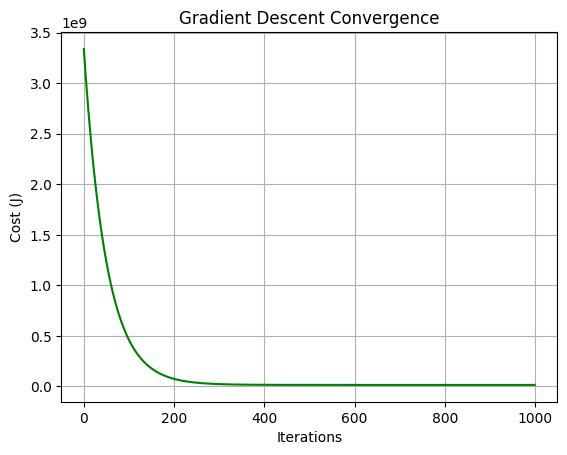

In [122]:
plt.plot(range(len(cost_history)), cost_history, color='green')
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()


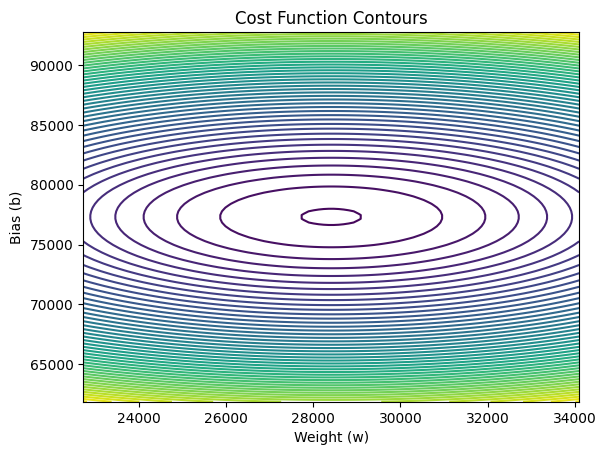

In [123]:
w_values = np.linspace(w - 0.2*w, w + 0.2*w, 100)
b_values = np.linspace(b - 0.2*b, b + 0.2*b, 100)
J_vals = np.zeros((len(w_values), len(b_values)))

for i in range(len(w_values)):
    for j in range(len(b_values)):
        J_vals[i, j] = calculate_cost(train_x_norm, train_y, w_values[i], b_values[j])

W, B = np.meshgrid(w_values, b_values)
plt.contour(W, B, J_vals.T, levels=50, cmap='viridis')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Cost Function Contours')
plt.show()



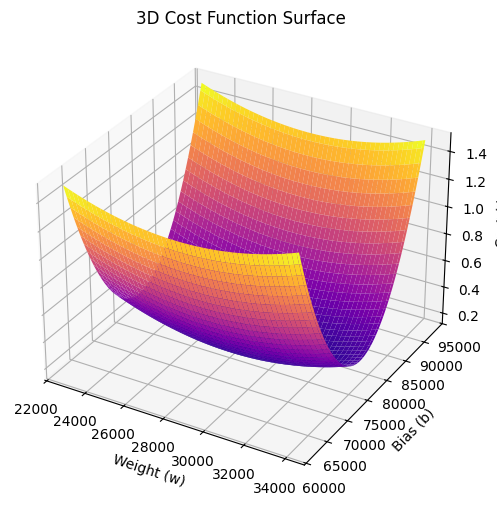

In [124]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals.T, cmap='plasma')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost (J)')
ax.set_title('3D Cost Function Surface')
plt.show()


[-30791.4448072    4808.75677443   -591.92131089 -14847.78824116
 -12390.95556684  14563.37908452]


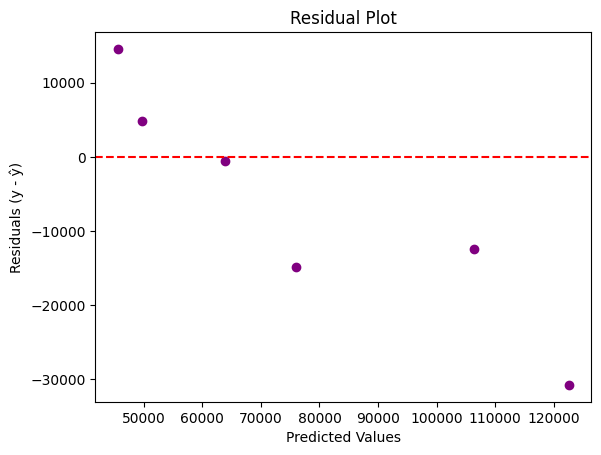

In [128]:
residuals = test_y - test_predictions
print(residuals)
plt.scatter(test_predictions, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residual Plot")
plt.show()


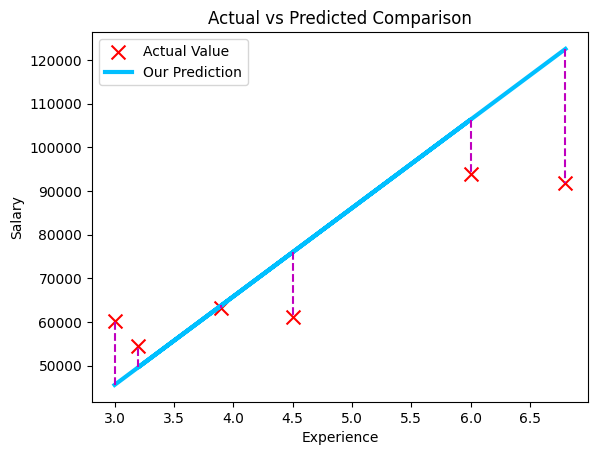

In [126]:
plt.scatter(test_x, test_y, color='red', marker='x', s=100, label='Actual Value')
plt.plot(test_x, test_predictions, color='deepskyblue', linewidth=3, label='Our Prediction')

for i in range(len(test_x)):
    plt.plot([test_x[i], test_x[i]], [test_predictions[i], test_y[i]], 'm--', linewidth=1.5)
    cost = (test_predictions[i] - test_y[i])**2
    # plt.text(x[i]-0.22, ((y_pred[i]+y[i])/2)+1000, f'{int(cost)}', color='purple', fontsize=9)

plt.title("Housing Prices", fontsize=12)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Comparison")
plt.legend()
plt.show()